## General Libraries

In [37]:
import pandas as pd
import numpy as np
import keras

import os
from os import listdir
from os.path import isfile, join
from pathlib import Path

from google.colab import drive

In [38]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [40]:
# Base directory 
base_dir = '/content/drive/My Drive/02 Job Applications/01 Case Studies'

# Subdirectories
adsquare = os.path.join(base_dir, 'Adsquare')
affinities = os.path.join(adsquare, 'affinities')
sample_data_dir = os.path.join(adsquare, 'sample_data')
full_data_dir = os.path.join(adsquare, 'full_data')

## Reading the datasets

In [41]:
stores = pd.read_csv(os.path.join(adsquare, 'stores.csv'))
example = pd.read_csv(os.path.join(adsquare, 'example.csv'))

In [43]:
# It is possible to create a dataframe from the full dataset, it takes about a minute to load. Yet I will use the sample data set for the analysis.
full_from_sample = (pd.read_csv(f, encoding='utf8') for f in Path(full_data_dir).rglob('part_*.csv'))
full_df  = pd.concat(full_from_sample, ignore_index=True)

In [42]:
df_from_sample = (pd.read_csv(f, encoding='utf8') for f in Path(sample_data_dir).rglob('part_*.csv'))
sample_df  = pd.concat(df_from_sample, ignore_index=True)

In [14]:
# The list of all device ids in the sample dataset.
device_df = pd.DataFrame(sample_df['device_id']).drop_duplicates(keep='first')
device_df.head() 

,device_id
0,21166
1,22514
2,19025
3,21728
4,5646


### Reading affinities

Reading the individual files in the affinities folder

In [20]:
filenames = [f for f in listdir(affinities) if isfile(join(affinities, f))]

In [22]:
print(filenames)

['student', 'honda', 'addidas', 'retired', 'bmw', 'employed', 'h_&_m', 'mercedes-benz', 'job_seeking', 'tommy_helfinger', 'apple', 'male', 'female', 'low_income', 'middle_income', 'high_income']


In [23]:
with open(os.path.join(affinities, 'student')) as f:
   student = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
   student['student'] = 1
   student = student.astype(str)

In [24]:
with open(os.path.join(affinities, 'honda')) as f:
  honda = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  honda['honda'] = 1
  honda = honda.astype(str)

In [25]:
with open(os.path.join(affinities, 'addidas')) as f:
  addidas = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  addidas['addidas'] = 1
  addidas = addidas.astype(str)

In [26]:
with open(os.path.join(affinities, 'retired')) as f:
  retired = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  retired['retired'] = 1
  retired = retired.astype(str)

In [27]:
with open(os.path.join(affinities, 'bmw')) as f:
  bmw = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  bmw['bmw'] = 1
  bmw = bmw.astype(str)

In [28]:
with open(os.path.join(affinities, 'employed')) as f:
   employed = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
   employed['employed'] = 1
   employed = employed.astype(str)

In [29]:
with open(os.path.join(affinities, 'h_&_m')) as f:
  hm = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  hm['h_&_m'] = 1
  hm = hm.astype(str)

In [30]:
with open(os.path.join(affinities, 'mercedes-benz')) as f:
  mercedes_benz = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  mercedes_benz['mercedes-benz'] = 1
  mercedes_benz = mercedes_benz.astype(str)


In [31]:
with open(os.path.join(affinities, 'job_seeking')) as f:
  job_seeking = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  job_seeking['job_seeking'] = 1
  job_seeking = job_seeking.astype(str)

In [32]:
with open(os.path.join(affinities, 'tommy_helfinger')) as f:
  tommy_helfinger = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  tommy_helfinger['tommy_helfinger'] = 1
  tommy_helfinger = tommy_helfinger.astype(str)

In [33]:
with open(os.path.join(affinities, 'apple')) as f:
  apple = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  apple['apple'] = 1
  apple = apple.astype(str)

In [34]:
with open(os.path.join(affinities, 'male')) as f:
  male = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  male['male'] = 1
  male = male.astype(str)

In [35]:
with open(os.path.join(affinities, 'female')) as f:
  female = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  female['female'] = 1
  female = female.astype(str)

In [36]:
with open(os.path.join(affinities, 'low_income')) as f:
  low_income = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  low_income['low_income'] = 1
  low_income = low_income.astype(str)

In [37]:
with open(os.path.join(affinities, 'middle_income')) as f:
  middle_income = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  middle_income['middle_income'] = 1
  middle_income = middle_income.astype(str)

In [38]:
with open(os.path.join(affinities, 'high_income')) as f:
  high_income = pd.DataFrame(f.read().splitlines(), columns=['device_id'])
  high_income['high_income'] = 1
  high_income = high_income.astype(str)

### Creating affinities dataset

Creating a dataset from all affinities

In [15]:
from functools import reduce

In [250]:
print(filenames)

['student', 'honda', 'addidas', 'retired', 'bmw', 'employed', 'h_&_m', 'mercedes-benz', 'job_seeking', 'tommy_helfinger', 'apple', 'male', 'female', 'low_income', 'middle_income', 'high_income']


In [39]:
device_df = device_df.astype(str)

In [40]:
df_names = [device_df, student, honda, addidas, retired, bmw, employed, hm, mercedes_benz, job_seeking, tommy_helfinger, apple, male, female, low_income, middle_income, high_income]

In [41]:
affinities_merged = reduce(lambda  left,right: pd.merge(left,right,on=['device_id'],
                                            how='outer'), df_names).fillna('0')

In [42]:
affinities_merged.head()

,device_id,student,honda,addidas,retired,bmw,employed,h_&_m,mercedes-benz,job_seeking,tommy_helfinger,apple,male,female,low_income,middle_income,high_income
0,21166,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,22514,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,19025,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,21728,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,5646,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [218]:
affinities_merged.isna().sum().sum()

0

In [ ]:
affinities_merged = affinities_merged.astype(int)

## Assignment

### Question 1

In [ ]:
!pip install geopandas

In [ ]:
!pip install geoplot

In [30]:
!pip install rtree

In [31]:
!pip install pygeos

In [5]:
import shapely
import shapely.wkt as wkt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import geopandas as gpd
import geoplot as gplt
import rtree, pygeos

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#### a. Resolve the user visits per store, i.e. filter the GPS signals through polygons.


In [11]:
sample_df['coordinates'] = sample_df[['lon', 'lat']].values.tolist()
sample_df['coordinates'] = sample_df['coordinates'].apply(Point)

In [12]:
stores['wkt'] = stores['wkt'].apply(wkt.loads) # shapely.geometry.polygon.Polygon

In [13]:
stores_geo = gpd.GeoDataFrame(stores, geometry='wkt')

In [14]:
sample_geo = gpd.GeoDataFrame(sample_df, geometry='coordinates')

In [16]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   store_id    247 non-null    object  
 1   store_name  247 non-null    object  
 2   wkt         247 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 5.9+ KB


In [17]:
stores_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   store_id    247 non-null    object  
 1   store_name  247 non-null    object  
 2   wkt         247 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 5.9+ KB


In [226]:
# Merging the sample data with the stores data
join_df = gpd.sjoin(sample_geo, stores_geo, how='inner',op="within")
join_df

,device_id,lat,lon,utc_timestamp,coordinates,index_right,store_id,store_name
1709,6790,52.431850,13.547149,1609535794000,POINT (13.54715 52.43185),24,place_25,McDonald's
9764,9288,52.431919,13.546910,1609520578000,POINT (13.54691 52.43192),24,place_25,McDonald's
815128,6790,52.431945,13.547024,1610209302000,POINT (13.54702 52.43194),24,place_25,McDonald's
969662,32917,52.431978,13.546926,1610262837000,POINT (13.54693 52.43198),24,place_25,McDonald's
1430959,20633,52.431950,13.547050,1610622726000,POINT (13.54705 52.43195),24,place_25,McDonald's
...,...,...,...,...,...,...,...,...
2022559,160071,52.510290,13.433080,1611110136000,POINT (13.43308 52.51029),51,place_52,Subway
2027305,47868,52.442190,13.585334,1611076538000,POINT (13.58533 52.44219),70,place_71,Aldi
2197231,21441,52.442287,13.585510,1611222793000,POINT (13.58551 52.44229),70,place_71,Aldi
2199763,21441,52.442227,13.585457,1611222868000,POINT (13.58546 52.44223),70,place_71,Aldi


In [319]:
# Question 1 part a
q1a = join_df.groupby(by=['store_id'], as_index=False)['device_id'].count()
q1a = q1a.rename({'device_id': 'total_signals'}, axis=1) 
q1a

,store_id,total_signals
0,place_1,7
1,place_10,3
2,place_101,2
3,place_102,8
4,place_103,3
...,...,...
181,place_95,1
182,place_96,7
183,place_97,9
184,place_98,9


#### b. Group the resolved visits by date (yyyy-mm-dd), store_name, and store_id.

In [25]:
import datetime

In [26]:
join_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2747 entries, 1709 to 2222718
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   device_id      2747 non-null   int64   
 1   lat            2747 non-null   float64 
 2   lon            2747 non-null   float64 
 3   utc_timestamp  2747 non-null   int64   
 4   coordinates    2747 non-null   geometry
 5   index_right    2747 non-null   int64   
 6   store_id       2747 non-null   object  
 7   store_name     2747 non-null   object  
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 193.1+ KB


In [228]:
# Converting the UTC Timestamp into readable date
join_df['date'] = pd.to_datetime(join_df['utc_timestamp'], unit='ms')
join_df['date'] = join_df.date.map(lambda x: x.strftime('%Y-%m-%d'))

In [181]:
join_df.head(2)

,device_id,lat,lon,utc_timestamp,coordinates,index_right,store_id,store_name,date
1709,6790,52.431850,13.547149,1609535794000,POINT (13.54715 52.43185),24,place_25,McDonald's,2021-01-01
9764,9288,52.431919,13.546910,1609520578000,POINT (13.54691 52.43192),24,place_25,McDonald's,2021-01-01


In [324]:
# Question 1 part b
q1b = join_df.groupby(['date', 'store_name', 'store_id'], as_index=False)['device_id'].count()
q1b = q1b.rename({'device_id': 'total_visits'}, axis=1) 
q1b

,date,store_name,store_id,total_visits
0,2021-01-01,Aldi,place_64,1
1,2021-01-01,Burger King,place_42,4
2,2021-01-01,Burger King,place_43,1
3,2021-01-01,Burger King,place_50,1
4,2021-01-01,McDonald's,place_17,1
...,...,...,...,...
1194,2021-01-21,Rewe,place_199,1
1195,2021-01-21,Rewe,place_200,1
1196,2021-01-21,Rewe,place_203,2
1197,2021-01-21,Rewe,place_209,3


#### c. For each store_id/store_name/date provide the following metric.

*   A total number of GPS signals per place_id/date.
*   A total number of unique visitors (i.e. device ids).
*   A total number of unique visitors belonging to each affinity group.

In [327]:
# Question 1 part c section i
q1c1 = pd.DataFrame(join_df[['store_name', 'store_id', 'date']].value_counts())
q1c1 = q1c1.reset_index()
q1c1.columns = ['store_name','store_id', 'date', 'total_signals']
q1c1

,store_name,store_id,date,total_signals
0,Kaufland,place_214,2021-01-16,23
1,Kaufland,place_214,2021-01-09,20
2,Kaufland,place_215,2021-01-16,15
3,Kaufland,place_216,2021-01-16,15
4,Kaufland,place_227,2021-01-08,13
...,...,...,...,...
1194,Renault,place_238,2021-01-15,1
1195,Renault,place_238,2021-01-13,1
1196,Renault,place_238,2021-01-11,1
1197,Renault,place_238,2021-01-07,1


In [317]:
# Question 1 part c section ii
q1c2 = join_df.groupby(['date', 'store_name', 'store_id'], as_index=False)['device_id'].nunique()
q1c2 = q1c2.rename({'device_id': 'unique_visits'}, axis=1)
q1c2

,date,store_name,store_id,unique_visits
0,2021-01-01,Aldi,place_64,1
1,2021-01-01,Burger King,place_42,1
2,2021-01-01,Burger King,place_43,1
3,2021-01-01,Burger King,place_50,1
4,2021-01-01,McDonald's,place_17,1
...,...,...,...,...
1194,2021-01-21,Rewe,place_199,1
1195,2021-01-21,Rewe,place_200,1
1196,2021-01-21,Rewe,place_203,2
1197,2021-01-21,Rewe,place_209,2


In [233]:
affinities_merged = affinities_merged.astype(int)

In [236]:
join_affinities = pd.merge(join_df, affinities_merged, on='device_id', how='left')

In [330]:
join_affinities.head()

,device_id,store_id,store_name,date,student,honda,addidas,retired,bmw,employed,h_&_m,mercedes-benz,job_seeking,tommy_helfinger,apple,male,female,low_income,middle_income,high_income
0,6790,place_25,McDonald's,2021-01-01,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,9288,place_25,McDonald's,2021-01-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,6790,place_25,McDonald's,2021-01-09,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,32917,place_25,McDonald's,2021-01-10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,20633,place_25,McDonald's,2021-01-14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [358]:
# Question 1 part c section iii
q1c3 = join_affinities.groupby(['date', 'store_name', 'store_id'], as_index=False)[filenames].sum()
q1c3

,date,store_name,store_id,student,honda,addidas,retired,bmw,employed,h_&_m,mercedes-benz,job_seeking,tommy_helfinger,apple,male,female,low_income,middle_income,high_income
0,2021-01-01,Aldi,place_64,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2021-01-01,Burger King,place_42,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,4
2,2021-01-01,Burger King,place_43,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2021-01-01,Burger King,place_50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2021-01-01,McDonald's,place_17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2021-01-21,Rewe,place_199,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1195,2021-01-21,Rewe,place_200,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1196,2021-01-21,Rewe,place_203,0,0,1,0,0,0,1,0,0,0,0,2,0,1,1,0
1197,2021-01-21,Rewe,place_209,0,0,0,0,0,0,0,0,0,0,0,3,0,2,1,0


#### d. An example of the expected format can be found in example.csv, you can download it here as a reference.

In [257]:
example.head()

,date,store_name,store_id,total_signals,unique_visits,apple,tommy_helfinger,middle_income,student,addidas,retired,high_income,male,employed,low_income,job_seeking,bmw,mercedes-benz,female,h_&_m,honda
0,2021-01-11,Aldi,place_101,16,3,0,0,2,0,0,0,0,3,0,1,0,0,0,0,1,0
1,2021-01-11,Aldi,place_102,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2021-01-11,Aldi,place_103,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
3,2021-01-11,Aldi,place_105,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2021-01-11,Aldi,place_106,4,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [365]:
q1c1.head()

,store_name,store_id,date,total_signals
0,Kaufland,place_214,2021-01-16,23
1,Kaufland,place_214,2021-01-09,20
2,Kaufland,place_215,2021-01-16,15
3,Kaufland,place_216,2021-01-16,15
4,Kaufland,place_227,2021-01-08,13


In [362]:
q1c2.head()

,date,store_name,store_id,unique_visits
0,2021-01-01,Aldi,place_64,1
1,2021-01-01,Burger King,place_42,1
2,2021-01-01,Burger King,place_43,1
3,2021-01-01,Burger King,place_50,1
4,2021-01-01,McDonald's,place_17,1


In [363]:
q1c3.head()

,date,store_name,store_id,student,honda,addidas,retired,bmw,employed,h_&_m,mercedes-benz,job_seeking,tommy_helfinger,apple,male,female,low_income,middle_income,high_income
0,2021-01-01,Aldi,place_64,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2021-01-01,Burger King,place_42,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,4
2,2021-01-01,Burger King,place_43,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2021-01-01,Burger King,place_50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2021-01-01,McDonald's,place_17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [370]:
q1c = [q1c1, q1c2, q1c3]

In [371]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['date','store_name','store_id'],
                                            how='outer'), q1c)

In [372]:
df

,store_name,store_id,date,total_signals,unique_visits,student,honda,addidas,retired,bmw,employed,h_&_m,mercedes-benz,job_seeking,tommy_helfinger,apple,male,female,low_income,middle_income,high_income
0,Kaufland,place_214,2021-01-16,23,15,0,1,0,0,2,2,2,0,0,0,6,23,0,3,16,4
1,Kaufland,place_214,2021-01-09,20,17,6,1,0,0,1,0,0,0,0,0,1,20,0,5,8,7
2,Kaufland,place_215,2021-01-16,15,7,1,0,0,0,0,1,0,1,1,0,4,11,4,0,11,4
3,Kaufland,place_216,2021-01-16,15,7,1,0,0,0,0,0,0,1,0,0,0,15,0,2,12,1
4,Kaufland,place_227,2021-01-08,13,9,0,0,0,0,0,2,1,0,0,0,1,12,1,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Renault,place_238,2021-01-15,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1195,Renault,place_238,2021-01-13,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1196,Renault,place_238,2021-01-11,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1197,Renault,place_238,2021-01-07,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Question 2

In [32]:
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from plotly.offline import iplot

In [51]:
df['date'] = pd.to_datetime(df['date'])

The visualizations of unique store visits over time, by store name and store id are showed below. 

**Here are some remarks from the graphs:**
- The trend shows that the most visits happen on Sundays, that could be understandable considering that most stores are actually closed on Sundays.
- The most visited store chain is Kaufland, followed by Rewe.
- The least visited store chain is Subway.
- The most visited store is place 214, followed by place 217 - both being Kaufland stores.
- On January 1, which is a public holiday, McDonald's is the most visited store helping hungry, probably hungover people to start the new year.

In [35]:
fig = px.bar(df, x="date", y="unique_visits", color="store_name", title="Unique Store Visits Over Time")
fig.show()

In [36]:
fig = px.bar(df, x="date", y="unique_visits", color="store_id", title="Unique Store Visits Over Time")
fig.show()

In [416]:
fig = px.bar(df, x="store_name", y="unique_visits", color="date", title="Unique Store Visits by Date")
fig.show()

In [418]:
fig = px.bar(df, x="store_id", y="unique_visits", color="date", title="Unique Store Visits")
fig.show()

### Question 3

The location of GPS signals of users in the sample data is visualized below. It locates in the northeast of Berlin in Brandenburg, Germany. The shape of all the GPS signal points makes up a hexagon.

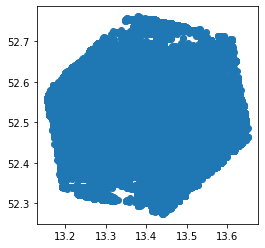

In [435]:
sample_geo.plot()

### Question 4

The shape of the first two stores are drawn below. Both are McDonald's stores of located in different buildings.

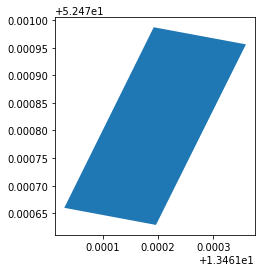

In [24]:
stores_geo[stores_geo['store_id'] == 'place_1'].plot()

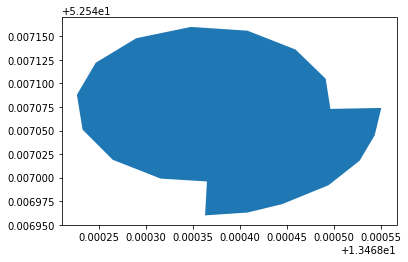

In [449]:
stores_geo[stores_geo['store_id'] == 'place_2'].plot()

All the stores in the stores dataset are pointed below. 

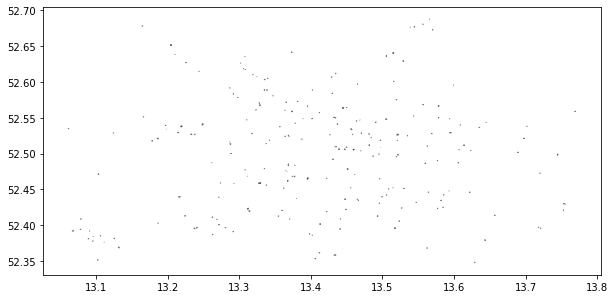

In [30]:
# All stores
stores_geo.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [25]:
# The boundaries
bounds = stores_geo.wkt.total_bounds
bounds

array([13.061099, 52.347768, 13.769761, 52.688131])

In [16]:
# Stores in question 1
df_geo = pd.DataFrame(df['store_id'])
df_geo = pd.merge(df_geo, stores_geo, on='store_id', how='left')
df_geo = gpd.GeoDataFrame(df_geo, geometry='wkt')

In [29]:
df_geo.wkt.total_bounds


array([13.165721, 52.352969, 13.635732, 52.688131])

All the stores in the df dataset created for Question 1 are pointed below. 

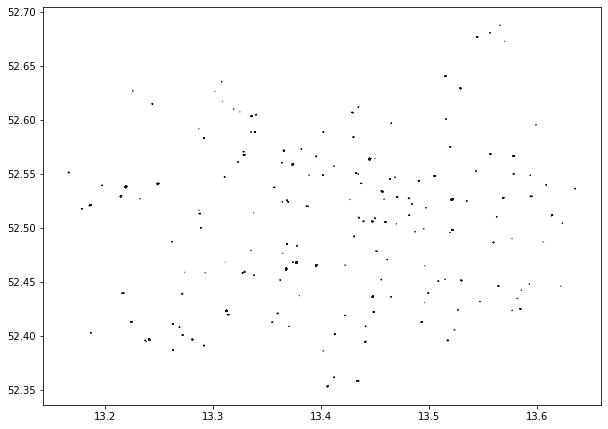

In [28]:
df_geo.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')